# Setup environment (libraries and packages)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import requests
import io
import scipy
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data, wb
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import style
import matplotlib.ticker as mtick
import datetime
from datetime import date
from dateutil.parser import parse
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams["figure.figsize"] = (21,7)
plt.style.use('seaborn-white')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Motivating Example: Tennis Game Decider - Multi-Model Edition

## Load, Encode, and Split Data

In [ ]:
# Load Dataset
data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTUuIaQ9l1B1ZxMZ-ucOUOzqX_uLcd7qA_HxHtB9MejT-G1SxcxTjE7k_rVpFFKl4me8wbppZRgJXUi/pub?gid=0&single=true&output=csv"
tennis_df = pd.read_csv(data_path)
print(tennis_df.head(3))

    outlook  temp humidity  windy play
0  overcast   hot     high  False  yes
1  overcast  cool   normal   True  yes
2  overcast  mild     high   True  yes


In [ ]:
tennis_df.shape

(14, 5)

In [ ]:
#Encode
lb = LabelEncoder() 
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

tennis_df['outlook_'] = lb.fit_transform(tennis_df['outlook']) 
tennis_df['temp_'] = lb.fit_transform(tennis_df['temp'] ) 
tennis_df['humidity_'] = lb.fit_transform(tennis_df['humidity'] ) 
tennis_df['windy_'] = lb.fit_transform(tennis_df['windy'] )   
tennis_df['play_'] = lb.fit_transform(tennis_df['play'] ) 

X = tennis_df.iloc[:,5:9] 
Y = tennis_df.iloc[:,9]

#Split
X_train, X_test , y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 106)

In [ ]:
tennis_df.head(3)

,outlook,temp,humidity,windy,play,outlook_,temp_,humidity_,windy_,play_
0,overcast,hot,high,False,yes,0,1,0,0,1
1,overcast,cool,normal,True,yes,0,0,1,1,1
2,overcast,mild,high,True,yes,0,2,0,1,1


## Logistic Regression (liblinear)

In [ ]:
classifier1 = LogisticRegression(solver = 'liblinear')
classifier1.fit( X_train, y_train )
y_pred1 = classifier1.predict( X_test )

cm1 = confusion_matrix( y_test, y_pred1 )
print("Accuracy on Test Set for Logistic Regression (liblinear): %.2f" % ((cm1[0,0] + cm1[1,1] )/len(X_test)))
scoresLR1 = cross_val_score( classifier1, X_train, y_train, cv=2)
print("Logistic Regression (liblinear) CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scoresLR1.mean(), scoresLR1.std() ))

Accuracy on Test Set for Logistic Regression (liblinear): 0.80
Logistic Regression (liblinear) CrossVal Train Set Accuracy Mean: 0.65 and Standard Deviation: 0.15 



## Logistic Regression (lbfgs)

In [ ]:
classifier2 = LogisticRegression(solver = 'lbfgs')
classifier2.fit( X_train, y_train )
y_pred2 = classifier2.predict( X_test )

cm2 = confusion_matrix( y_test, y_pred2 )
print("Accuracy on Test Set for Logistic Regression (lbfgs): %.2f" % ((cm2[0,0] + cm2[1,1] )/len(X_test)))
scoresLR2 = cross_val_score( classifier2, X_train, y_train, cv=3)
print("Logistic Regression (lbfgs) CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scoresLR2.mean(), scoresLR2.std() ))

Accuracy on Test Set for Logistic Regression (lbfgs): 0.80
Logistic Regression (lbfgs) CrossVal Train Set Accuracy Mean: 0.56 and Standard Deviation: 0.16 



## Decision Tree Classifier (entropy)

In [ ]:
classifier3 = DecisionTreeClassifier(criterion='entropy')
classifier3.fit( X_train, y_train )
y_pred3 = classifier3.predict( X_test )

cm3 = confusion_matrix( y_test, y_pred3 )
print("Accuracy on Test Set for Decision Tree (entropy) = %.2f" % ((cm3[0,0] + cm3[1,1] )/len(X_test)))
scoresDT3 = cross_val_score( classifier3, X_train, y_train, cv=2)
print("Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scoresDT3.mean(), scoresDT3.std() ))

Accuracy on Test Set for Decision Tree (entropy) = 0.60
Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: 0.55 and Standard Deviation: 0.05 



## Random Forest Classifier

In [ ]:
classifier4 = RandomForestClassifier(n_estimators=10)
classifier4.fit( X_train, y_train )
y_pred4 = classifier4.predict( X_test )

cm4 = confusion_matrix( y_test, y_pred4 )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm4[0,0] + cm4[1,1] )/len(X_test)))
scoresRF4 = cross_val_score( classifier4, X_train, y_train, cv=2)
print("Mean RandomForest CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scoresRF4.mean(), scoresRF4.std() ))

Accuracy on Test Set for RandomForest = 0.60
Mean RandomForest CrossVal Train Set Accuracy Mean: 0.55 and Standard Deviation: 0.05 



## Print out all of the measures for easy comparison.

In [ ]:
print("Accuracy on Test Set for Logistic Regression (liblinear): %.2f" % ((cm1[0,0] + cm1[1,1] )/len(X_test)))
scoresLR1 = cross_val_score( classifier1, X_train, y_train, cv=2)
print("Logistic Regression (liblinear) CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scoresLR1.mean(), scoresLR1.std() ))
print("Accuracy on Test Set for Logistic Regression (lbfgs): %.2f" % ((cm2[0,0] + cm2[1,1] )/len(X_test)))
scoresLR2 = cross_val_score( classifier2, X_train, y_train, cv=2)
print("Logistic Regression (lbfgs) CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scoresLR2.mean(), scoresLR2.std() ))
print("Accuracy on Test Set for Decision Tree (entropy) = %.2f" % ((cm3[0,0] + cm3[1,1] )/len(X_test)))
scoresDT3 = cross_val_score( classifier3, X_train, y_train, cv=2)
print("Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scoresDT3.mean(), scoresDT3.std() ))
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm4[0,0] + cm4[1,1] )/len(X_test)))
scoresRF4 = cross_val_score( classifier4, X_train, y_train, cv=2)
print("Mean RandomForest CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n" % (scoresRF4.mean(), scoresRF4.std() ))

Accuracy on Test Set for Logistic Regression (liblinear): 0.80
Logistic Regression (liblinear) CrossVal Train Set Accuracy Mean: 0.65 and Standard Deviation: 0.15 

Accuracy on Test Set for Logistic Regression (lbfgs): 0.80
Logistic Regression (lbfgs) CrossVal Train Set Accuracy Mean: 0.65 and Standard Deviation: 0.15 

Accuracy on Test Set for Decision Tree (entropy) = 0.60
Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: 0.55 and Standard Deviation: 0.05 

Accuracy on Test Set for RandomForest = 0.60
Mean RandomForest CrossVal Train Set Accuracy Mean: 0.68 and Standard Deviation: 0.08 



##Return to lecture material

# Visualization of a Decision Tree (entropy)

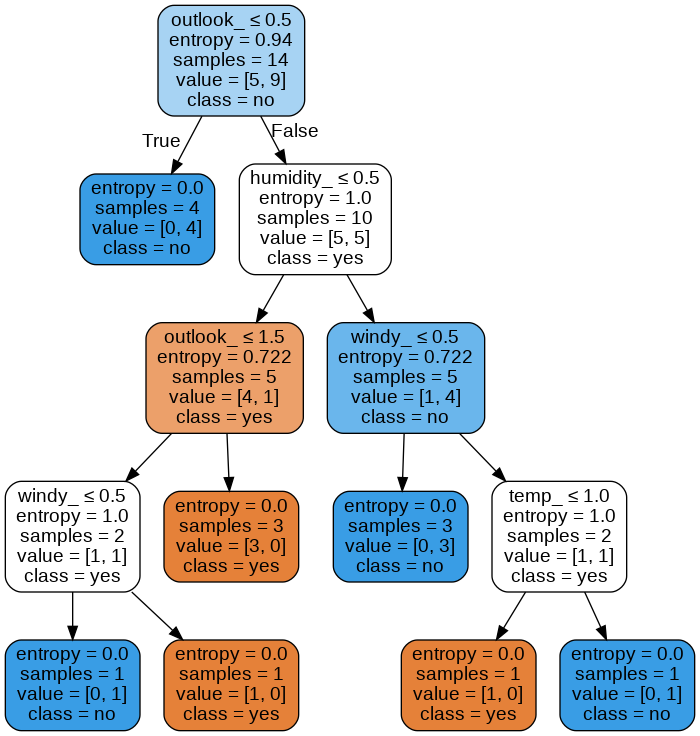

In [ ]:
#Note: The example below uses *all* of the data (14 records) in order to build a more detailed tree.
#If we were build it using the split data, the tree wouldn't look as interesting.

classifier3a = DecisionTreeClassifier(criterion='entropy')
classifier3a.fit( X, Y )
dot_data = StringIO()
export_graphviz(classifier3a, out_file=dot_data, feature_names=list(X),
                class_names=list(tennis_df.iloc[:,4].unique()),
                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
tennis_df.reindex(sorted(tennis_df.columns), axis=1).sort_values(by=['outlook'])


,humidity,humidity_,outlook,outlook_,play,play_,temp,temp_,windy,windy_
0,high,0,overcast,0,yes,1,hot,1,False,0
1,normal,1,overcast,0,yes,1,cool,0,True,1
2,high,0,overcast,0,yes,1,mild,2,True,1
3,normal,1,overcast,0,yes,1,hot,1,False,0
4,normal,1,rainy,1,no,0,cool,0,True,1
5,high,0,rainy,1,no,0,mild,2,True,1
6,high,0,rainy,1,yes,1,mild,2,False,0
7,normal,1,rainy,1,yes,1,cool,0,False,0
8,normal,1,rainy,1,yes,1,mild,2,False,0
9,high,0,sunny,2,no,0,hot,1,False,0


# Motivating Example: KNN Model for Diabetes Prediction

## This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five years.

**Fields description follow:**

* Pregnancies = Number of times pregnant
* Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure = Diastolic blood pressure (mm Hg)
* SkinThickness = Triceps skin fold thickness (mm)
* Insulin = 2-Hour serum insulin (mu U/ml)
* BMI = Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction = Diabetes pedigree function
* Age = Age (years)
* Outcome = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [ ]:
# Load Dataset
data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTUuIaQ9l1B1ZxMZ-ucOUOzqX_uLcd7qA_HxHtB9MejT-G1SxcxTjE7k_rVpFFKl4me8wbppZRgJXUi/pub?gid=1117785238&single=true&output=csv"
diabetes_df = pd.read_csv(data_path)

In [ ]:
diabetes_df.iloc[:].head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.60,0.35,31,0
1,8,183,64,0,0,23.30,0.67,32,1
2,1,89,66,23,94,28.10,0.17,21,0


In [ ]:
X = diabetes_df.drop('Outcome',axis=1).values
y = diabetes_df['Outcome'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=6, stratify=y)

In [ ]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

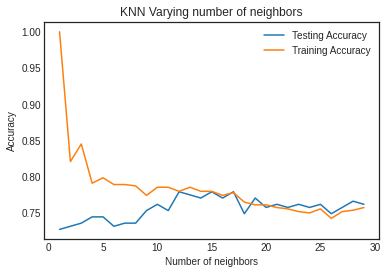

In [ ]:
#Generate plot
#https://www.researchgate.net/publication/313554124_Review_on_Determining_of_Cluster_in_K-means_Clustering
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Based on the above
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test,y_test)

0.7359307359307359

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)
#True Negatives: 134 and True Positives: 36

array([[134,  17],
       [ 44,  36]])

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,134,17,151
1,44,36,80
All,178,53,231


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       151
           1       0.68      0.45      0.54        80

    accuracy                           0.74       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.73      0.74      0.72       231



In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

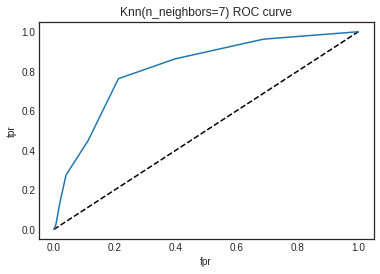

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

**A Receiver Operating Characteristic (ROC) is a graph showing the performance of a classification model at all classification thresholds.  It is plotted along the False Positive and True Positive Rates.**

AUC stands for “Area under the ROC Curve.”  That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).  The ROC Curve/AUC Score is most useful when we are evaluating a model to itself.  Ground truths and predictions are 1’s and 0’s. However, our forecast is never a 1 or a 0. Instead, we predict a probability and then assessed it whether or not it’s 1 or a 0. Typically, the classification threshold is .5 (in the middle). But we could have better-performing classification threshold. **

In [ ]:
roc_auc_score(y_test,y_pred_proba)

0.8138658940397352

##Execute grid search to and perform a semi-exhaustive search for better parameters

In [ ]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn2 = KNeighborsClassifier()
knn_cv= GridSearchCV(knn2,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## Compare the value above to the value earlier

In [ ]:
#Grid Search:
print(knn_cv.best_score_)
print(knn_cv.best_params_)

0.7588489941431117
{'n_neighbors': 14}


In [ ]:
#Manual / Visual Analysis:
print(knn.score(X_test,y_test))
print(knn.n_neighbors)

0.7359307359307359
7


In [ ]:
roc_auc_score(y_test,y_pred_proba)

0.8138658940397352

# Re-run with optimal settings

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       151
           1       0.81      0.44      0.57        80

    accuracy                           0.77       231
   macro avg       0.79      0.69      0.71       231
weighted avg       0.78      0.77      0.75       231



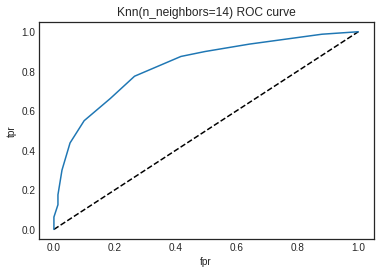

0.8243377483443708

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=14)
knn3.fit(X_train,y_train)
knn3.score(X_test,y_test)
y_pred2 = knn3.predict(X_test)
confusion_matrix(y_test,y_pred2)
pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(y_test,y_pred2))
y_pred_proba2 = knn3.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba2)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=14) ROC curve')
plt.show()
roc_auc_score(y_test,y_pred_proba2)